In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap
import numpy as np
import geopandas as gpd
import seaborn as sns
from geopandas.tools import sjoin
import contextily as ctx
from shapely import wkt

In [2]:
london_lsoa_2019_loc = 'datasets/UK_LSOA/london_lsoa_2019_gpd.geojson'
birmingham_lsoa_2019_loc ='datasets/UK_LSOA/birmingham_lsoa_2019_gpd.geojson'
liverpool_lsoa_2019_loc = 'datasets/UK_LSOA/liverpool_lsoa_2019_gpd.geojson'

london_voronoi_vs_lsoa_loc = 'datasets/Telefonica_Antenna/XG/london_voronoi_vs_lsoa.geojson'
birmingham_voronoi_vs_lsoa_loc = 'datasets/Telefonica_Antenna/XG/birmingham_voronoi_vs_lsoa.geojson'
liverpool_voronoi_vs_lsoa_loc = 'datasets/Telefonica_Antenna/XG/liverpool_voronoi_vs_lsoa.geojson'

london_antenna_gpd_voronoi_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_london_gpd_voronoi.geojson'
birmingham_antenna_gpd_voronoi_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_birmingham_gpd_voronoi.geojson'
liverpool_antenna_gpd_voronoi_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_liverpool_gpd_voronoi.geojson'

london_antenna_imd_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_london_imd_pd.csv'
birmingham_antenna_imd_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_birmingham_imd_pd.csv'
liverpool_antenna_imd_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_liverpool_imd_pd.csv'

london_homeantenna_loc = 'datasets/012020/home_ldn_onlysmartphones.csv'
birmingham_homeantenna_loc = 'datasets/012020/home_birm_onlysmartphones.csv'
liverpool_homeantenna_loc = 'datasets/012020/home_lpool_onlysmartphones.csv'

london_gyration_loc = 'datasets/012020/ldn_gy_res.csv'
birmingham_gyration_loc = 'datasets/012020/birm_gy_res.csv'
liverpool_gyration_loc = 'datasets/012020/lpool_gy_res.csv'

cdres_london_loc = 'datasets/012020/ldn_cd_res.csv'
cdnonres_london_loc = 'datasets/012020/ldn_cd_nonres.csv'
cdres_birmingham_loc = 'datasets/012020/birm_cd_res.csv'
cdnonres_birmingham_loc = 'datasets/012020/birm_cd_nonres.csv'
cdres_liverpool_loc = 'datasets/012020/lpool_cd_res.csv'
cdnonres_liverpool_loc = 'datasets/012020/lpool_cd_nonres.csv'

london_userperf_loc = 'datasets/012020/userperf_ldn_2020_jan_onlysmartphones.csv'
birmingham_userperf_loc = 'datasets/012020/userperf_birm_2020_jan_onlysmartphones.csv'
liverpool_userperf_loc = 'datasets/012020/userperf_lpool_2020_jan_onlysmartphones.csv'

# 0 LSOA areas vs Antenna Voronoi areas

NOTE:

Datasets are already in EPSG 3857: unit = metres, https://epsg.io/3857 <br>
Some systems use degrees as units and should not be used for area calculation, e.g. EPSG 4326 : https://epsg.io/4326

In [3]:
london_lsoa_2019_gpd = gpd.read_file(london_lsoa_2019_loc)
birmingham_lsoa_2019_gpd = gpd.read_file(birmingham_lsoa_2019_loc)
liverpool_lsoa_2019_gpd = gpd.read_file(liverpool_lsoa_2019_loc)
    
london_lsoa_2019_gpd['area_type'] = 'lsoa'
birmingham_lsoa_2019_gpd['area_type'] = 'lsoa'
liverpool_lsoa_2019_gpd['area_type'] = 'lsoa'

## 0.1 LSOA areas vs XG Antenna Voronoi areas

In [4]:
london_voronoi_vs_lsoa = gpd.read_file(london_voronoi_vs_lsoa_loc)
birmingham_voronoi_vs_lsoa = gpd.read_file(birmingham_voronoi_vs_lsoa_loc)
liverpool_voronoi_vs_lsoa = gpd.read_file(liverpool_voronoi_vs_lsoa_loc)

london_voronoi_vs_lsoa['area_type'] = 'voronoi'
birmingham_voronoi_vs_lsoa['area_type'] = 'voronoi'
liverpool_voronoi_vs_lsoa['area_type'] = 'voronoi'

london_areas = gpd.GeoDataFrame(pd.concat([london_lsoa_2019_gpd,london_voronoi_vs_lsoa], sort=False, ignore_index=True), crs=london_lsoa_2019_gpd.crs)
birmingham_areas = gpd.GeoDataFrame(pd.concat([birmingham_lsoa_2019_gpd,birmingham_voronoi_vs_lsoa], sort=False, ignore_index=True), crs=birmingham_lsoa_2019_gpd.crs)
liverpool_areas = gpd.GeoDataFrame(pd.concat([liverpool_lsoa_2019_gpd,liverpool_voronoi_vs_lsoa], sort=False, ignore_index=True), crs=liverpool_lsoa_2019_gpd.crs)

london_areas['area_size'] = london_areas['geometry'].area/ 10**6
birmingham_areas['area_size'] = birmingham_areas['geometry'].area/ 10**6
liverpool_areas['area_size'] = liverpool_areas['geometry'].area/ 10**6

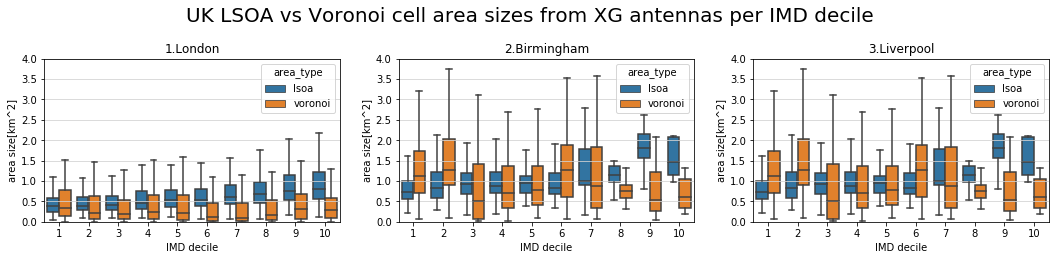

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('UK LSOA vs Voronoi cell area sizes from XG antennas per IMD decile', size=20, y=1.12)
def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,4])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('area size[km^2]')

#london = sns.violinplot(ax = ax[0], x='IMDDecil', y='area_size', hue='area_type',scale='area', data=london_areas, split=True, showfliers=False)
london = sns.boxplot(ax = ax[0], x='IMDDecil', y='area_size', hue='area_type', data=london_areas, showfliers=False)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

#birmingham = sns.violinplot(ax=ax[1], x='IMDDecil', y='area_size', hue='area_type',scale='area', data=birmingham_areas, split=True, showfliers=False)
birmingham = sns.boxplot(ax=ax[1], x='IMDDecil', y='area_size', hue='area_type', data=birmingham_areas, showfliers=False)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

#liverpool = sns.violinplot(ax=ax[2], x='IMDDecil', y='area_size', hue='area_type',scale='area', data=birmingham_areas, split=True, showfliers=False)
liverpool = sns.boxplot(ax=ax[2], x='IMDDecil', y='area_size', hue='area_type', data=birmingham_areas, showfliers=False)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# 1 "Figure 1: Number of LSOAs per decile in London"

In [6]:
london_lsoa_2019_gpd = gpd.read_file(london_lsoa_2019_loc)
birmingham_lsoa_2019_gpd = gpd.read_file(birmingham_lsoa_2019_loc)
liverpool_lsoa_2019_gpd = gpd.read_file(liverpool_lsoa_2019_loc)

london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

In [7]:
london_homeantenna_pd = london_homeantenna_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
birmingham_homeantenna_pd = birmingham_homeantenna_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
liverpool_homeantenna_pd = liverpool_homeantenna_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

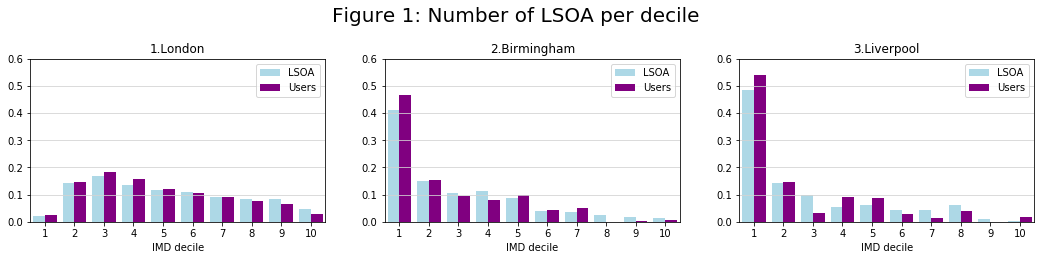

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 1: Number of LSOA per decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.6])
    ax.set_xlabel('IMD decile')
    ax.set_xlim([0.5,10.5])
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.legend()
    
ax[0].hist([london_lsoa_2019_gpd['IMDDecil'],london_homeantenna_pd['IMDDecil']],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True,label=['LSOA', 'Users'])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].hist([birmingham_lsoa_2019_gpd['IMDDecil'],birmingham_homeantenna_pd['IMDDecil']],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True,label=['LSOA', 'Users'])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].hist([liverpool_lsoa_2019_gpd['IMDDecil'],liverpool_homeantenna_pd['IMDDecil']],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True,label=['LSOA', 'Users'])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# 2. "Figure 2: Network Quality Across Socioeconomic Classes"

In [80]:
london_userperf_pd = pd.read_csv(london_userperf_loc, index_col=False)
birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc, index_col=False)
liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc, index_col=False)

london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

london_userperf_pd = pd.merge(london_userperf_pd, london_homeantenna_pd, on='device_id', how='inner')
london_userperf_pd = pd.merge(london_userperf_pd, london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_homeantenna_pd, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_homeantenna_pd, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

In [81]:
for column in ['avg(rtt4g_avg)', 'avg(retx4g_avg)']:
    london_userperf_pd[column] = london_userperf_pd[column]/london_userperf_pd[column].max()
    birmingham_userperf_pd[column] = birmingham_userperf_pd[column]/birmingham_userperf_pd[column].max()
    liverpool_userperf_pd[column] = liverpool_userperf_pd[column]/liverpool_userperf_pd[column].max()    
#     london_userperf_pd[column] = london_userperf_pd[column]/london_userperf_pd[column].quantile(.9)
#     birmingham_userperf_pd[column] = birmingham_userperf_pd[column]/birmingham_userperf_pd[column].quantile(.9)
#     liverpool_userperf_pd[column] = liverpool_userperf_pd[column]/liverpool_userperf_pd[column].quantile(.9)

london_userperf_pd['sum(bytes4g)_ratio'] = london_userperf_pd['sum(bytes4g)']/london_userperf_pd['sum(bytesall)']
birmingham_userperf_pd['sum(bytes4g)_ratio'] = birmingham_userperf_pd['sum(bytes4g)']/birmingham_userperf_pd['sum(bytesall)']
liverpool_userperf_pd['sum(bytes4g)_ratio'] = liverpool_userperf_pd['sum(bytes4g)']/liverpool_userperf_pd['sum(bytesall)']

## 2.1 "(a) Ratio of data consumed via 4G"

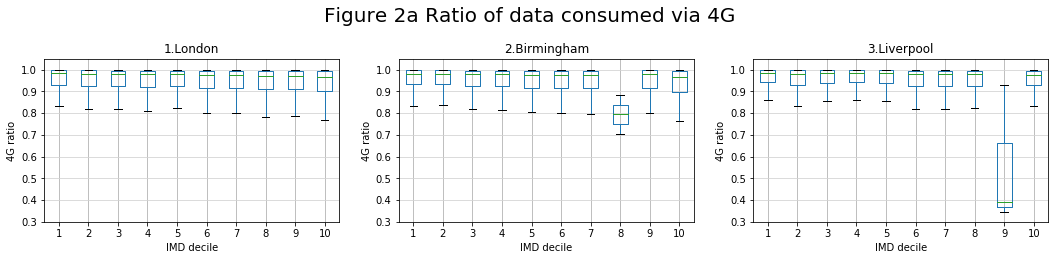

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 2a Ratio of data consumed via 4G', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0.3,1.05])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('4G ratio')
    
london_userperf_pd.pivot(columns='IMDDecil', values='sum(bytes4g)_ratio').boxplot(showfliers =False,ax=ax[0])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham_userperf_pd.pivot(columns='IMDDecil', values='sum(bytes4g)_ratio').boxplot(showfliers =False,ax=ax[1])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool_userperf_pd.pivot(columns='IMDDecil', values='sum(bytes4g)_ratio').boxplot(showfliers =False,ax=ax[2])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

## 2.2 "(b) Avg. packet retran. frequency of TCP sessions"

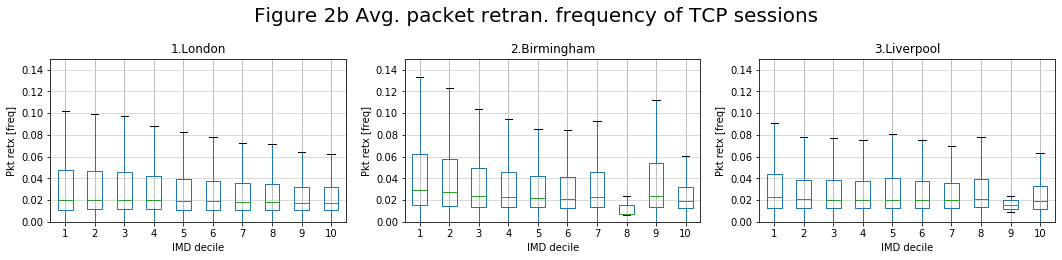

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 2b Avg. packet retran. frequency of TCP sessions', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.15])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Pkt retx [freq]')
    
london_userperf_pd.pivot(columns='IMDDecil', values='avg(retx4g_avg)').boxplot(showfliers =False,ax=ax[0])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham_userperf_pd.pivot(columns='IMDDecil', values='avg(retx4g_avg)').boxplot(showfliers =False,ax=ax[1])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool_userperf_pd.pivot(columns='IMDDecil', values='avg(retx4g_avg)').boxplot(showfliers =False,ax=ax[2])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

## 2.3 "(c) Avg. latency of sessions"

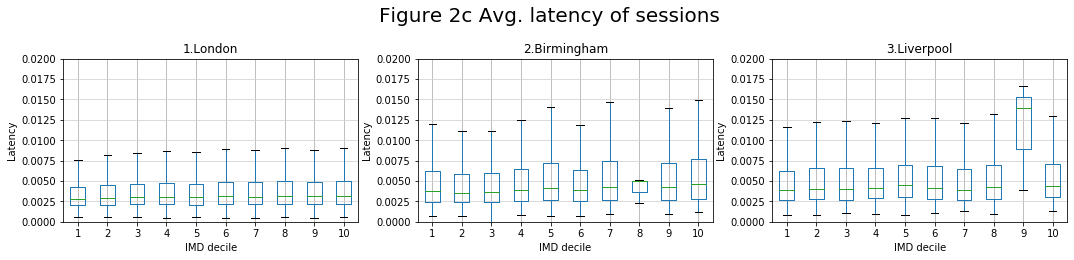

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 2c Avg. latency of sessions', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.02])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Latency')
    
london_userperf_pd.pivot(columns='IMDDecil', values='avg(rtt4g_avg)').boxplot(showfliers =False,ax=ax[0])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham_userperf_pd.pivot(columns='IMDDecil', values='avg(rtt4g_avg)').boxplot(showfliers =False,ax=ax[1])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool_userperf_pd.pivot(columns='IMDDecil', values='avg(rtt4g_avg)').boxplot(showfliers =False,ax=ax[2])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# 3 "Figure 3: Aggregated sector level analysis"

## 3.1 "(a) Distribution of number of sectors per LSOA."

In [76]:
london_lsoa_2019_gpd = gpd.read_file(london_lsoa_2019_loc)
birmingham_lsoa_2019_gpd = gpd.read_file(birmingham_lsoa_2019_loc)
liverpool_lsoa_2019_gpd = gpd.read_file(liverpool_lsoa_2019_loc)

# filter 4G antennas
london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
london_antenna_imd_pd = london_antenna_imd_pd[london_antenna_imd_pd['generation']=='4G']
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = birmingham_antenna_imd_pd[birmingham_antenna_imd_pd['generation']=='4G']
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = liverpool_antenna_imd_pd[liverpool_antenna_imd_pd['generation']=='4G']

## solution v0.1- based on voronoi overlap with LSOAs
## convert antenna pandas to geodataframes with coordinates of voronoi polygons corresponding to each antenna
# london_antenna_imd_pd['geometry'] = london_antenna_imd_pd['geometry_voronoi'].apply(wkt.loads)
# london_antenna_gpd_voronoi = gpd.GeoDataFrame(london_antenna_imd_pd, geometry='geometry').drop(columns=['geometry_voronoi','lkey','generation','IMDDecil']).rename(columns={'geometry_voronoi': 'geometry'})
# birmingham_antenna_imd_pd['geometry'] = birmingham_antenna_imd_pd['geometry_voronoi'].apply(wkt.loads)
# birmingham_antenna_gpd_voronoi = gpd.GeoDataFrame(birmingham_antenna_imd_pd, geometry='geometry').drop(columns=['geometry_voronoi','lkey','generation','IMDDecil']).rename(columns={'geometry_voronoi': 'geometry'})
# liverpool_antenna_imd_pd['geometry'] = liverpool_antenna_imd_pd['geometry_voronoi'].apply(wkt.loads)
# liverpool_antenna_gpd_voronoi = gpd.GeoDataFrame(liverpool_antenna_imd_pd, geometry='geometry').drop(columns=['geometry_voronoi','lkey','generation','IMDDecil']).rename(columns={'geometry_voronoi': 'geometry'})

## solution v0.2 - antenna coordinates within LSOAs
## solution v0.2 - closests N antenna coordinates to LSOA centroid
# antenna coordinates
london_antenna_imd_pd['geometry'] = london_antenna_imd_pd['geometry'].apply(wkt.loads)
london_antenna_gpd = gpd.GeoDataFrame(london_antenna_imd_pd, geometry='geometry').drop(columns=['geometry_voronoi','lkey','generation','IMDDecil']).rename(columns={'geometry_voronoi': 'geometry'})
birmingham_antenna_imd_pd['geometry'] = birmingham_antenna_imd_pd['geometry'].apply(wkt.loads)
birmingham_antenna_gpd = gpd.GeoDataFrame(birmingham_antenna_imd_pd, geometry='geometry').drop(columns=['geometry_voronoi','lkey','generation','IMDDecil']).rename(columns={'geometry_voronoi': 'geometry'})
liverpool_antenna_imd_pd['geometry'] = liverpool_antenna_imd_pd['geometry'].apply(wkt.loads)
liverpool_antenna_gpd = gpd.GeoDataFrame(liverpool_antenna_imd_pd, geometry='geometry').drop(columns=['geometry_voronoi','lkey','generation','IMDDecil']).rename(columns={'geometry_voronoi': 'geometry'})

## solution v0.2 - antenna coordinates within LSOAs
# count intersection of 4G Antennas voronoi cells with LSOAs
# london_Ant_x_LSOA_count = sjoin(london_lsoa_2019_gpd,london_antenna_gpd, how='left',op='intersects').reset_index()
# london_Ant_x_LSOA_count = london_Ant_x_LSOA_count.groupby(['index','IMDDecil'], as_index=False).count().drop(columns=['index','geometry']).rename(columns={'index_right': '4G_antenna_count'})

# birmingham_Ant_x_LSOA_count = sjoin(birmingham_lsoa_2019_gpd,birmingham_antenna_gpd, how='left',op='intersects').reset_index()
# birmingham_Ant_x_LSOA_count = birmingham_Ant_x_LSOA_count.groupby(['index','IMDDecil'], as_index=False).count().drop(columns=['index','geometry']).rename(columns={'index_right': '4G_antenna_count'})

# liverpool_Ant_x_LSOA_count = sjoin(liverpool_lsoa_2019_gpd,liverpool_antenna_gpd, how='left',op='intersects').reset_index()
# liverpool_Ant_x_LSOA_count = liverpool_Ant_x_LSOA_count.groupby(['index','IMDDecil'], as_index=False).count().drop(columns=['index','geometry']).rename(columns={'index_right': '4G_antenna_count'})

In [78]:
def avg_n_dist(point, series, num_antennas1, num_antennas2):
    distances = []
    for pt in series:
        distances.append(point.distance(pt))
    distances.sort()
    return [distances[0], np.mean(distances[:num_antennas1]), np.mean(distances[:num_antennas2])]

london_lsoa_2019_gpd['centroid_geometry'] = london_lsoa_2019_gpd.geometry.centroid
birmingham_lsoa_2019_gpd['centroid_geometry'] = birmingham_lsoa_2019_gpd.geometry.centroid
liverpool_lsoa_2019_gpd['centroid_geometry'] = liverpool_lsoa_2019_gpd.geometry.centroid

avg_1_distances = []
avg_3_distances = []
avg_5_distances = []
for lsoa_centroid in london_lsoa_2019_gpd['centroid_geometry']:
    n1, n3, n5 = avg_n_dist(lsoa_centroid, london_antenna_gpd['geometry'],3,5)
    avg_1_distances.append(n1)
    avg_3_distances.append(n3)
    avg_5_distances.append(n5)
london_lsoa_2019_gpd['avg_distance_to_1_antennas'] = np.array(avg_1_distances)/1000
london_lsoa_2019_gpd['avg_distance_to_3_antennas'] = np.array(avg_3_distances)/1000
london_lsoa_2019_gpd['avg_distance_to_5_antennas'] = np.array(avg_5_distances)/1000

avg_1_distances = []
avg_3_distances = []
avg_5_distances = []
for lsoa_centroid in birmingham_lsoa_2019_gpd['centroid_geometry']:
    n1, n3, n5 = avg_n_dist(lsoa_centroid, birmingham_antenna_gpd['geometry'],3,5)
    avg_1_distances.append(n1)    
    avg_3_distances.append(n3)
    avg_5_distances.append(n5)
birmingham_lsoa_2019_gpd['avg_distance_to_1_antennas'] = np.array(avg_1_distances)/1000
birmingham_lsoa_2019_gpd['avg_distance_to_3_antennas'] = np.array(avg_3_distances)/1000
birmingham_lsoa_2019_gpd['avg_distance_to_5_antennas'] = np.array(avg_5_distances)/1000

avg_1_distances = []
avg_3_distances = []
avg_5_distances = []
for lsoa_centroid in liverpool_lsoa_2019_gpd['centroid_geometry']:
    n1, n3, n5 = avg_n_dist(lsoa_centroid, liverpool_antenna_gpd['geometry'],3,5)
    avg_1_distances.append(n1)    
    avg_3_distances.append(n3)
    avg_5_distances.append(n5)
liverpool_lsoa_2019_gpd['avg_distance_to_1_antennas'] = np.array(avg_1_distances)/1000
liverpool_lsoa_2019_gpd['avg_distance_to_3_antennas'] = np.array(avg_3_distances)/1000
liverpool_lsoa_2019_gpd['avg_distance_to_5_antennas'] = np.array(avg_5_distances)/1000

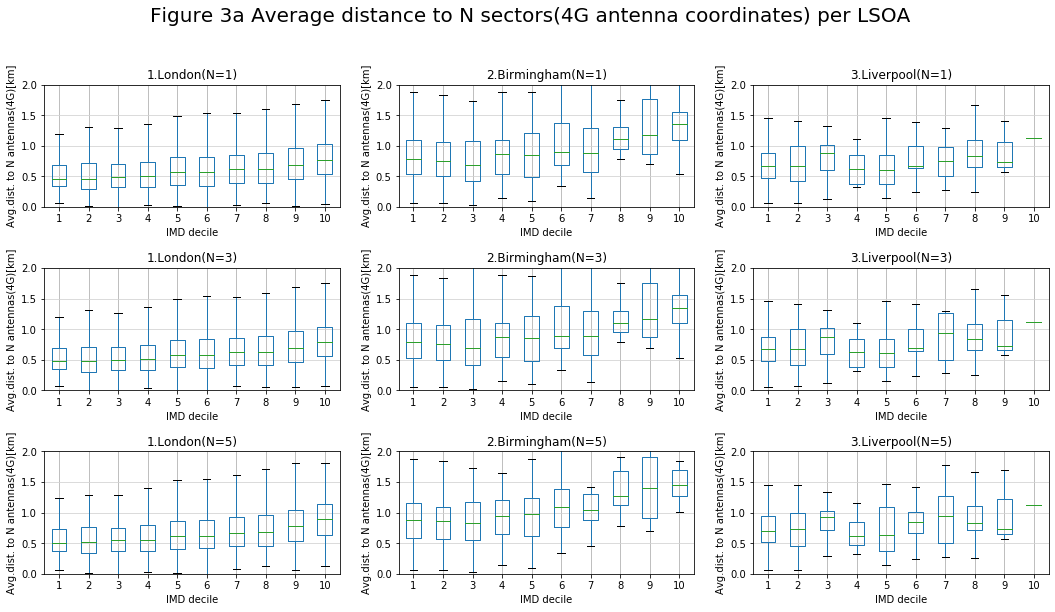

In [81]:
fig, ax = plt.subplots(3, 3, figsize=(18, 9), facecolor='w', edgecolor='k')
fig.suptitle('Figure 3a Average distance to N sectors(4G antenna coordinates) per LSOA', size=20, y=1)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,2])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Avg.dist. to N antennas(4G)[km]')

# v0.3
london_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_1_antennas').boxplot(showfliers =False,ax=ax[0,0])
applyPlotStyle(ax[0,0])
ax[0,0].set_title('1.London(N=1)')

birmingham_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_1_antennas').boxplot(showfliers =False,ax=ax[0,1])
applyPlotStyle(ax[0,1])
ax[0,1].set_title('2.Birmingham(N=1)')

liverpool_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_1_antennas').boxplot(showfliers =False,ax=ax[0,2])
applyPlotStyle(ax[0,2])
ax[0,2].set_title('3.Liverpool(N=1)')

london_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_3_antennas').boxplot(showfliers =False,ax=ax[1,0])
applyPlotStyle(ax[1,0])
ax[1,0].set_title('1.London(N=3)')

birmingham_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_3_antennas').boxplot(showfliers =False,ax=ax[1,1])
applyPlotStyle(ax[1,1])
ax[1,1].set_title('2.Birmingham(N=3)')

liverpool_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_3_antennas').boxplot(showfliers =False,ax=ax[1,2])
applyPlotStyle(ax[1,2])
ax[1,2].set_title('3.Liverpool(N=3)')

london_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_5_antennas').boxplot(showfliers =False,ax=ax[2,0])
applyPlotStyle(ax[2,0])
ax[2,0].set_title('1.London(N=5)')

birmingham_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_5_antennas').boxplot(showfliers =False,ax=ax[2,1])
applyPlotStyle(ax[2,1])
ax[2,1].set_title('2.Birmingham(N=5)')

liverpool_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_5_antennas').boxplot(showfliers =False,ax=ax[2,2])
applyPlotStyle(ax[2,2])
ax[2,2].set_title('3.Liverpool(N=5)')
plt.subplots_adjust(hspace=0.5);


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 3a Average distance to N sectors(4G antenna coordinates) per LSOA, N=5', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0,15.5])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Avg.distance to 3 antennas(4G)[m]')

# v0.3
london_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_n_antennas').boxplot(showfliers =False,ax=ax[0])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_n_antennas').boxplot(showfliers =False,ax=ax[1])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool_lsoa_2019_gpd.pivot(columns='IMDDecil', values='avg_distance_to_n_antennas').boxplot(showfliers =False,ax=ax[2])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

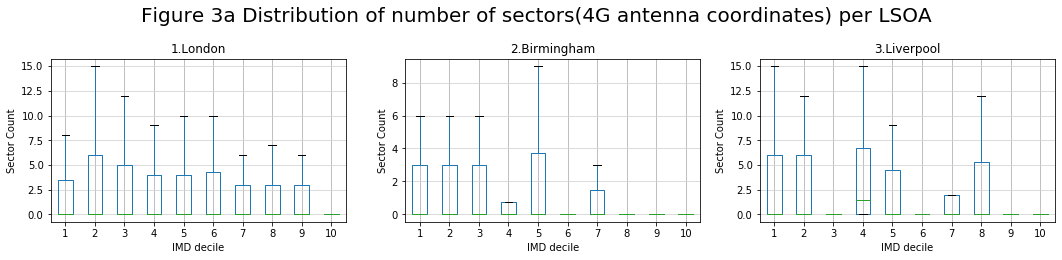

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
#fig.suptitle('Figure 3a Distribution of number of sectors(4G antenna coordinates) per LSOA', size=20, y=1.12)

# def applyPlotStyle(ax):
#     ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
#     #ax.set_ylim([0,15.5])
#     ax.set_xlabel('IMD decile')
#     ax.set_ylabel('Avg.distance to 3 antennas(4G)[m]')
    
# v0.2
# london_Ant_x_LSOA_count.pivot(columns='IMDDecil', values='4G_antenna_count').boxplot(showfliers =False,ax=ax[0])
# applyPlotStyle(ax[0])
# ax[0].set_title('1.London')

# birmingham_Ant_x_LSOA_count.pivot(columns='IMDDecil', values='4G_antenna_count').boxplot(showfliers =False,ax=ax[1])
# applyPlotStyle(ax[1])
# ax[1].set_title('2.Birmingham')

# liverpool_Ant_x_LSOA_count.pivot(columns='IMDDecil', values='4G_antenna_count').boxplot(showfliers =False,ax=ax[2])
# applyPlotStyle(ax[2])
# ax[2].set_title('3.Liverpool');

## 3.2 "(b) Distribution of number of residents’ devices served by sectors"

In [76]:
london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
london_antenna_imd_pd = london_antenna_imd_pd[london_antenna_imd_pd['generation']=='4G']
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = birmingham_antenna_imd_pd[birmingham_antenna_imd_pd['generation']=='4G']
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = liverpool_antenna_imd_pd[liverpool_antenna_imd_pd['generation']=='4G']

In [77]:
london_homeantenna_pd = london_homeantenna_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
birmingham_homeantenna_pd = birmingham_homeantenna_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
liverpool_homeantenna_pd = liverpool_homeantenna_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

In [78]:
birmingham_res_count = birmingham_homeantenna_pd[birmingham_homeantenna_pd['generation']=='4G'].groupby(['antenna_id','IMDDecil'], as_index=False).count().drop(columns=['antenna_id','generation']).rename(columns={'device_id': '4G_res_count'})
liverpool_res_count = liverpool_homeantenna_pd[liverpool_homeantenna_pd['generation']=='4G'].groupby(['antenna_id','IMDDecil'], as_index=False).count().drop(columns=['antenna_id','generation']).rename(columns={'device_id': '4G_res_count'})
london_res_count = london_homeantenna_pd[london_homeantenna_pd['generation']=='4G'].groupby(['antenna_id','IMDDecil'], as_index=False).count().drop(columns=['antenna_id','generation']).rename(columns={'device_id': '4G_res_count'})

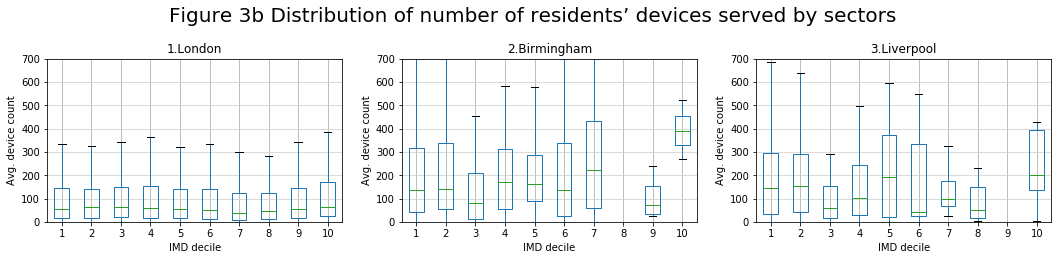

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 3b Distribution of number of residents’ devices served by sectors', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,700])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Avg. device count')
    
london_res_count.pivot(columns='IMDDecil', values='4G_res_count').boxplot(showfliers =False,ax=ax[0])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

# manually add missing 0 values for IMD 8
brmghm_res_plt = birmingham_res_count.pivot(columns='IMDDecil', values='4G_res_count')
brmghm_res_plt.insert(7, "8", 0)
brmghm_res_plt.boxplot(showfliers =False,ax=ax[1])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

# manually add missing 0 values for IMD 9
lvrpl_res_plt = liverpool_res_count.pivot(columns='IMDDecil', values='4G_res_count')
lvrpl_res_plt.insert(8, "9", 0)
lvrpl_res_plt.boxplot(showfliers =False,ax=ax[2])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

## 3.3 "(c) Cumulated time load of an average sector"

In [50]:
cdres_london_pd = pd.read_csv(cdres_london_loc, index_col=False)
cdnonres_london_pd = pd.read_csv(cdnonres_london_loc, index_col=False)
cdres_birmingham_pd = pd.read_csv(cdres_birmingham_loc, index_col=False)
cdnonres_birmingham_pd = pd.read_csv(cdnonres_birmingham_loc, index_col=False)
cdres_liverpool_pd = pd.read_csv(cdres_liverpool_loc, index_col=False)
cdnonres_liverpool_pd = pd.read_csv(cdnonres_liverpool_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
london_antenna_imd_pd = london_antenna_imd_pd[london_antenna_imd_pd['generation']=='4G']
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = birmingham_antenna_imd_pd[birmingham_antenna_imd_pd['generation']=='4G']
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = liverpool_antenna_imd_pd[liverpool_antenna_imd_pd['generation']=='4G']

In [55]:
london_density_res_avg_per_imd = cdres_london_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby('IMDDecil')['avg_sum_time'].mean()/3600000
london_density_nonres_avg_per_imd = cdnonres_london_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby('IMDDecil')['avg_sum_time'].mean()/3600000
birmingham_density_res_avg_per_imd = cdres_birmingham_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby('IMDDecil')['avg_sum_time'].mean()/3600000
birmingham_density_nonres_avg_per_imd = cdnonres_birmingham_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby('IMDDecil')['avg_sum_time'].mean()/3600000
liverpool_density_res_avg_per_imd = cdres_liverpool_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby('IMDDecil')['avg_sum_time'].mean()/3600000
liverpool_density_nonres_avg_per_imd = cdnonres_liverpool_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby('IMDDecil')['avg_sum_time'].mean()/3600000

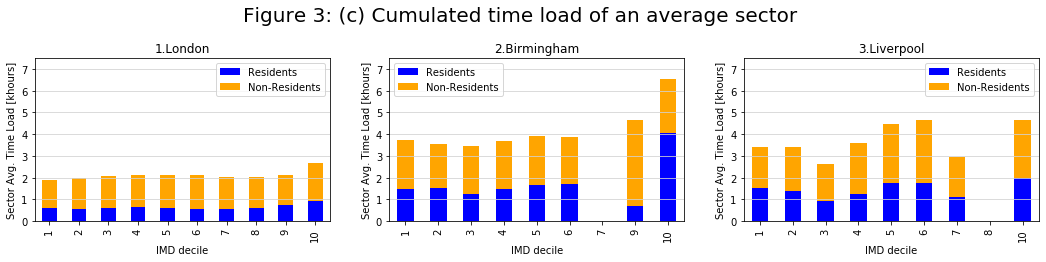

In [57]:
fig, ax= plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 3: (c) Cumulated time load of an average sector', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,7.5])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Sector Avg. Time Load [khours]')
    ax.legend()

london_density_res_avg_per_imd.plot(kind='bar', stacked=True,ax=ax[0],color='blue',label='Residents')
london_density_nonres_avg_per_imd.plot(kind='bar', stacked=True,bottom=london_density_res_avg_per_imd,ax=ax[0],color='orange',label='Non-Residents')
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

# manually add missing 0 values for IMD 8
birmingham_density_res_avg_per_imd.loc[7]=0
birmingham_density_nonres_avg_per_imd.loc[7]=0
birmingham_density_res_avg_per_imd.sort_index().plot(kind='bar', stacked=True,ax=ax[1],color='blue',label='Residents')
birmingham_density_nonres_avg_per_imd.sort_index().plot(kind='bar', stacked=True,bottom=birmingham_density_res_avg_per_imd,ax=ax[1],color='orange',label='Non-Residents')
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

# manually add missing 0 values for IMD 9
liverpool_density_res_avg_per_imd.loc[8]=0
liverpool_density_nonres_avg_per_imd.loc[8]=0
liverpool_density_res_avg_per_imd.sort_index().plot(kind='bar', stacked=True,ax=ax[2],color='blue',label='Residents')
liverpool_density_nonres_avg_per_imd.sort_index().plot(kind='bar', stacked=True,bottom=liverpool_density_res_avg_per_imd,ax=ax[2],color='orange',label='Non-Residents')
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# 4 "Figure 4: Data consumption among IMD deciles" & "Figure 5: Avg number of bytes per sector."

In [25]:
london_userperf_pd = pd.read_csv(london_userperf_loc, index_col=False)
birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc, index_col=False)
liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc, index_col=False)

london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

london_userperf_pd = pd.merge(london_userperf_pd, london_homeantenna_pd, on='device_id', how='inner')
london_userperf_pd = pd.merge(london_userperf_pd, london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_homeantenna_pd, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_homeantenna_pd, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

In [26]:
london_users10mb = london_userperf_pd.loc[london_userperf_pd['sum(bytesall)'] <=10000000].groupby('IMDDecil')['device_id'].count()
london_users5gb = london_userperf_pd.loc[london_userperf_pd['sum(bytesall)'] >=5000000000].groupby('IMDDecil')['device_id'].count()
london_users = london_userperf_pd.groupby('IMDDecil')['device_id'].count()
london_plot_pd = pd.DataFrame([london_users10mb/london_users, london_users5gb/london_users],index=['<10 MB','>5 GB']).T

birmingham_users10mb = birmingham_userperf_pd.loc[birmingham_userperf_pd['sum(bytesall)'] <=10000000].groupby('IMDDecil')['device_id'].count()
birmingham_users5gb = birmingham_userperf_pd.loc[birmingham_userperf_pd['sum(bytesall)'] >=5000000000].groupby('IMDDecil')['device_id'].count()
birmingham_users = birmingham_userperf_pd.groupby('IMDDecil')['device_id'].count()
birmingham_plot_pd = pd.DataFrame([birmingham_users10mb/birmingham_users, birmingham_users5gb/birmingham_users],index=['<10 MB','>5 GB']).T

liverpool_users10mb = liverpool_userperf_pd.loc[liverpool_userperf_pd['sum(bytesall)'] <=10000000].groupby('IMDDecil')['device_id'].count()
liverpool_users5gb = liverpool_userperf_pd.loc[liverpool_userperf_pd['sum(bytesall)'] >=5000000000].groupby('IMDDecil')['device_id'].count()
liverpool_users = liverpool_userperf_pd.groupby('IMDDecil')['device_id'].count()
liverpool_plot_pd = pd.DataFrame([liverpool_users10mb/liverpool_users, liverpool_users5gb/liverpool_users],index=['<10 MB','>5 GB']).T

london_users10mb = london_userperf_pd.loc[london_userperf_pd['sum(bytes4g)'] <=10000000].groupby('IMDDecil')['device_id'].count()
london_users5gb = london_userperf_pd.loc[london_userperf_pd['sum(bytes4g)'] >=5000000000].groupby('IMDDecil')['device_id'].count()
london_plot_pd4g = pd.DataFrame([london_users10mb/london_users, london_users5gb/london_users],index=['<10 MB','>5 GB']).T

birmingham_users10mb = birmingham_userperf_pd.loc[birmingham_userperf_pd['sum(bytes4g)'] <=10000000].groupby('IMDDecil')['device_id'].count()
birmingham_users5gb = birmingham_userperf_pd.loc[birmingham_userperf_pd['sum(bytes4g)'] >=5000000000].groupby('IMDDecil')['device_id'].count()
birmingham_plot_pd4g = pd.DataFrame([birmingham_users10mb/birmingham_users, birmingham_users5gb/birmingham_users],index=['<10 MB','>5 GB']).T

liverpool_users10mb = liverpool_userperf_pd.loc[liverpool_userperf_pd['sum(bytes4g)'] <=10000000].groupby('IMDDecil')['device_id'].count()
liverpool_users5gb = liverpool_userperf_pd.loc[liverpool_userperf_pd['sum(bytes4g)'] >=5000000000].groupby('IMDDecil')['device_id'].count()
liverpool_plot_pd4g = pd.DataFrame([liverpool_users10mb/liverpool_users, liverpool_users5gb/liverpool_users],index=['<10 MB','>5 GB']).T

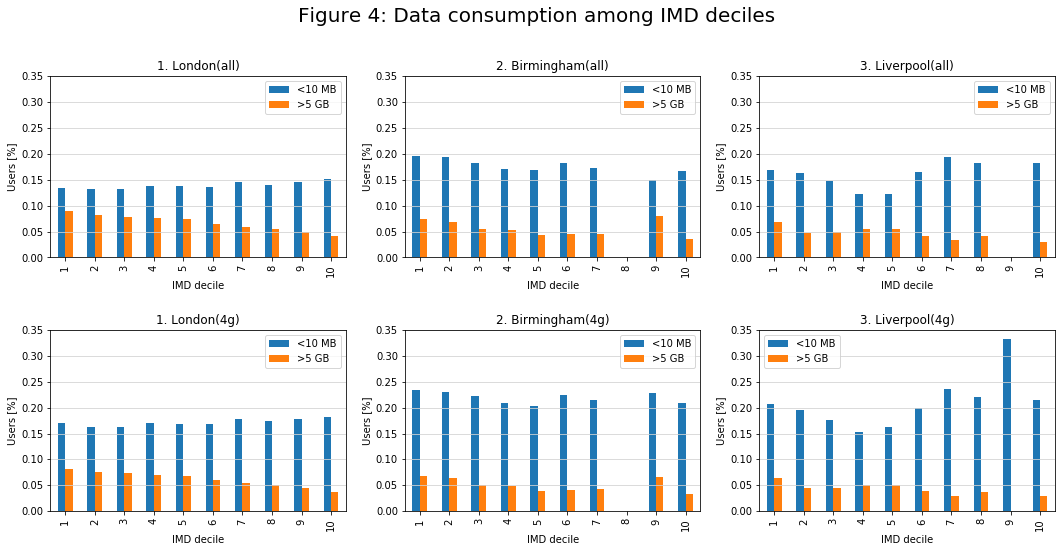

In [27]:
fig, ax= plt.subplots(2, 3, figsize=(18, 8), facecolor='w', edgecolor='k')
fig.suptitle('Figure 4: Data consumption among IMD deciles', size=20, y=1)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.35])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Users [%]')
    ax.legend()

london_plot_pd.plot.bar(ax=ax[0,0])
ax[0,0].set_title('1. London(all)')
applyPlotStyle(ax[0,0])

birmingham_plot_pd.plot.bar(ax=ax[0,1])
ax[0,1].set_title('2. Birmingham(all)')
applyPlotStyle(ax[0,1])

liverpool_plot_pd.plot.bar(ax=ax[0,2])
ax[0,2].set_title('3. Liverpool(all)')
applyPlotStyle(ax[0,2])

london_plot_pd4g.plot.bar(ax=ax[1,0])
ax[1,0].set_title('1. London(4g)')
applyPlotStyle(ax[1,0])

birmingham_plot_pd4g.plot.bar(ax=ax[1,1])
ax[1,1].set_title('2. Birmingham(4g)')
applyPlotStyle(ax[1,1])

liverpool_plot_pd4g.plot.bar(ax=ax[1,2])
ax[1,2].set_title('3. Liverpool(4g)')
applyPlotStyle(ax[1,2])
fig.subplots_adjust(hspace=0.4);

In [28]:
london_userperf_pd['avg(bytesall)'] = london_userperf_pd['avg(bytesall)']/london_userperf_pd['avg(bytesall)'].quantile(.9)
birmingham_userperf_pd['avg(bytesall)'] = birmingham_userperf_pd['avg(bytesall)']/birmingham_userperf_pd['avg(bytesall)'].quantile(.9)
liverpool_userperf_pd['avg(bytesall)'] = liverpool_userperf_pd['avg(bytesall)']/liverpool_userperf_pd['avg(bytesall)'].quantile(.9)

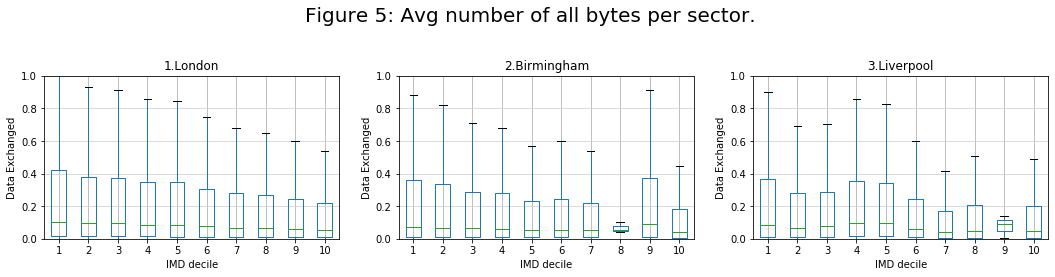

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 5: Avg number of all bytes per sector.', size=20, y=1.2)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,1])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Data Exchanged')
    
london_userperf_pd.pivot(columns='IMDDecil', values='avg(bytesall)').boxplot(showfliers =False,ax=ax[0])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham_userperf_pd.pivot(columns='IMDDecil', values='avg(bytesall)').boxplot(showfliers =False,ax=ax[1])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool_userperf_pd.pivot(columns='IMDDecil', values='avg(bytesall)').boxplot(showfliers =False,ax=ax[2])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# 6 "Figure 6: Distribution of time load of IMD deciles’ sectors."

We will not use machine learning results as in previous version of the paper

# 7 "Figure 7: IMD deciles of London (less deprived colored in dark red)"

In [30]:
london_lsoa_2019_gpd = gpd.read_file(london_lsoa_2019_loc)
birmingham_lsoa_2019_gpd = gpd.read_file(birmingham_lsoa_2019_loc)
liverpool_lsoa_2019_gpd = gpd.read_file(liverpool_lsoa_2019_loc)

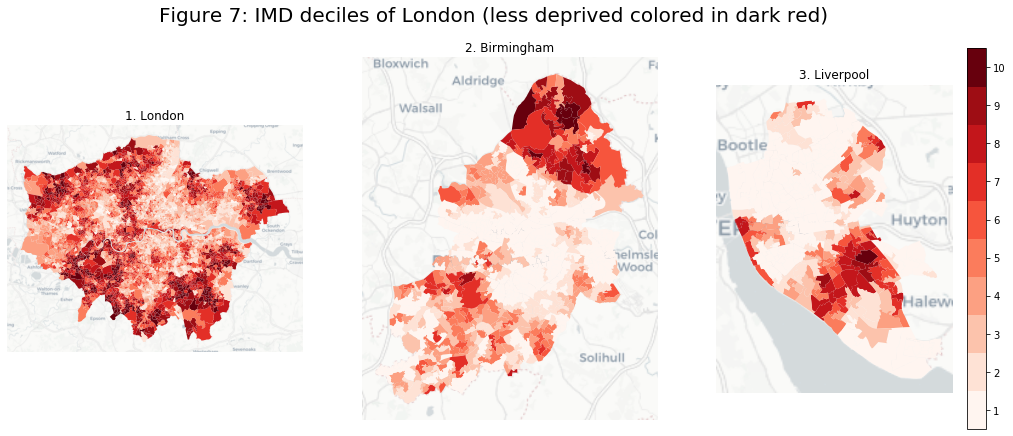

In [34]:
def add_basemap(ax, zoom, url="http://a.basemaps.cartocdn.com/light_all/tileZ/tileX/tileY.png"):#url='http://tile.stamen.com/toner/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    ax.set_axis_off()

fig, ax = plt.subplots(1, 3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.suptitle('Figure 7: IMD deciles of London (less deprived colored in dark red)', size=20, y=0.825)

LSOA_polygons_ldn = london_lsoa_2019_gpd.plot(ax=ax[0],alpha = 1, column='IMDDecil',cmap=plt.cm.get_cmap('Reds', 10),edgecolor='none')
ax[0].set_title('1. London')
add_basemap(ax[0], zoom=10)

birmingham_lsoa_2019_gpd.plot(ax=ax[1],alpha = 1, column='IMDDecil',cmap=plt.cm.get_cmap('Reds', 10),edgecolor='none')
ax[1].set_title('2. Birmingham')
add_basemap(ax[1], zoom=10)

liverpool_lsoa_2019_gpd.plot(ax=ax[2],alpha = 1, column='IMDDecil',cmap=plt.cm.get_cmap('Reds', 10),edgecolor='none')
ax[2].set_title('3. Liverpool')
add_basemap(ax[2], zoom=10)

cbar = plt.colorbar(LSOA_polygons_ldn.collections[0], shrink=0.7, ticks=[1.45,2.35,3.25,4.15,5.05,5.95,6.85,7.75,8.65,9.55])
cbar.ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10']);

# 8 "Figure 10: Boxenplot (combining a boxplot with a distribution) of gyration of IMD deciles"

In [35]:
london_gyration_pd = pd.read_csv(london_gyration_loc, index_col=False)
birmingham_gyration_pd = pd.read_csv(birmingham_gyration_loc, index_col=False)
liverpool_gyration_pd = pd.read_csv(liverpool_gyration_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

In [36]:
london_gyration_pd = london_gyration_pd.merge(london_antenna_imd_pd, left_on='home_antenna_id', right_on='lkey', how='inner')
birmingham_gyration_pd = birmingham_gyration_pd.merge(birmingham_antenna_imd_pd, left_on='home_antenna_id', right_on='lkey', how='inner')
liverpool_gyration_pd = liverpool_gyration_pd.merge(liverpool_antenna_imd_pd, left_on='home_antenna_id', right_on='lkey', how='inner')

london_gyration_pd['avg_sum_gyration'] = london_gyration_pd['avg_sum_gyration']/1000
birmingham_gyration_pd['avg_sum_gyration'] = birmingham_gyration_pd['avg_sum_gyration']/1000
liverpool_gyration_pd['avg_sum_gyration'] = liverpool_gyration_pd['avg_sum_gyration']/1000

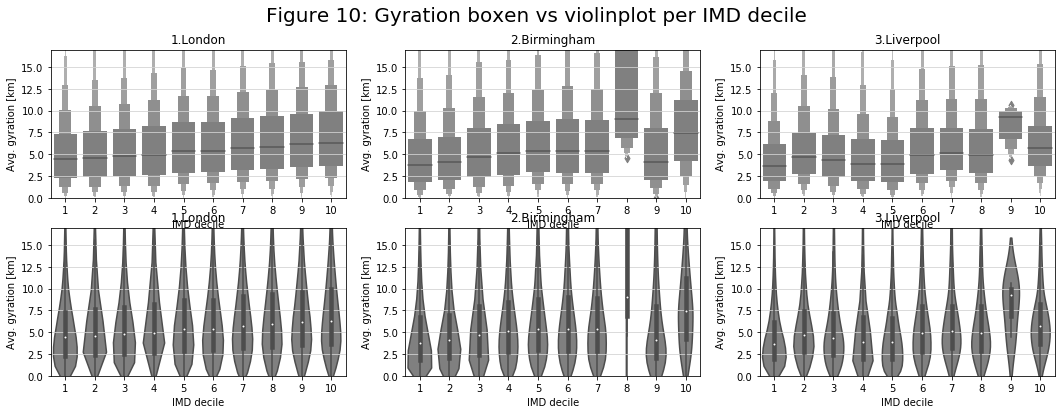

In [37]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), facecolor='w', edgecolor='k')
fig.suptitle('Figure 10: Gyration boxen vs violinplot per IMD decile', size=20)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,17])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Avg. gyration [km]')
    #ax.set_yscale('log')

sns.boxenplot(x='IMDDecil', y='avg_sum_gyration', data=london_gyration_pd, ax=ax[0,0], color='grey')
applyPlotStyle(ax[0,0])
ax[0,0].set_title('1.London')

sns.boxenplot(x='IMDDecil', y='avg_sum_gyration', data=birmingham_gyration_pd, ax=ax[0,1], color='grey')
applyPlotStyle(ax[0,1])
ax[0,1].set_title('2.Birmingham')

sns.boxenplot(x='IMDDecil', y='avg_sum_gyration', data=liverpool_gyration_pd, ax=ax[0,2], color='grey')
applyPlotStyle(ax[0,2])
ax[0,2].set_title('3.Liverpool')

sns.violinplot(x='IMDDecil', y='avg_sum_gyration', data=london_gyration_pd, ax=ax[1,0], color='grey')
applyPlotStyle(ax[1,0])
ax[1,0].set_title('1.London')

sns.violinplot(x='IMDDecil', y='avg_sum_gyration', data=birmingham_gyration_pd, ax=ax[1,1], color='grey')
applyPlotStyle(ax[1,1])
ax[1,1].set_title('2.Birmingham')

sns.violinplot(x='IMDDecil', y='avg_sum_gyration', data=liverpool_gyration_pd, ax=ax[1,2], color='grey')
applyPlotStyle(ax[1,2])
ax[1,2].set_title('3.Liverpool');

# 9 Fraction of residents in each IMD decile per city

In [92]:
london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

london_homeantenna_pd = london_homeantenna_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
birmingham_homeantenna_pd = birmingham_homeantenna_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
liverpool_homeantenna_pd = liverpool_homeantenna_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

In [97]:
london_res = london_homeantenna_pd.IMDDecil.value_counts().sort_index()
birmingham_res = birmingham_homeantenna_pd.IMDDecil.value_counts().sort_index()
liverpool_res = liverpool_homeantenna_pd.IMDDecil.value_counts().sort_index()

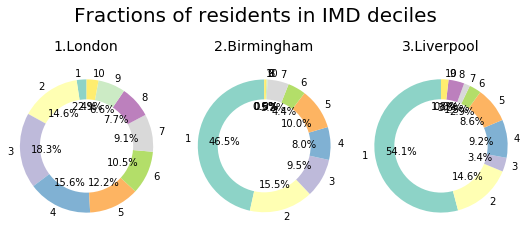

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), facecolor='w', edgecolor='k')
fig.suptitle('Fractions of residents in IMD deciles', size=20, y=1.15 )

def applyPlotStyle(ax):
    ax.set_xlabel('')
    ax.set_ylabel('')
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)
    ax.axis('equal')

IMD_deciles = [1,2,3,4,5,6,7,8,9,10]

london_homeantenna_pd.IMDDecil.value_counts().reindex(IMD_deciles, fill_value=0).plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90, cmap='Set3')
applyPlotStyle(ax[0])
ax[0].set_title('1.London', y=1.05, size=14)

birmingham_homeantenna_pd.IMDDecil.value_counts().reindex(IMD_deciles, fill_value=0).plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90, cmap='Set3')
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham', y=1.05, size=14)

liverpool_homeantenna_pd.IMDDecil.value_counts().reindex(IMD_deciles, fill_value=0).plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90, cmap='Set3')
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool', y=1.05, size=14);

# APPENDIX
Following two figures were not part of this project:  
"Figure 8: Visit frequency distribution (column-wise) in a matrix diagram"  
"Figure 9: Percentage of age groups over IMD deciles"